In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np

def data_preprocessing(filename):
    # Takes an excel file with the first column being names
    # ---------------In the form [f1,f2,f3..fn,class]----------%
    whole_data = pd.read_excel(filename).values
    endeffector_coor = whole_data[:, :-1]
    motor = whole_data[:, -1]

    # for 66% split
    P = np.random.permutation(motor.shape[0])
    traindata = endeffector_coor[P[:round(0.66*motor.shape[0])], :]
    # trainout = motor[P[:round(0.66*motor.shape[0])], :]


    # testdata = endeffector_coor[P[round(0.66*motor.shape[0])+1:], :]
    # testout = motor[P[round(0.66*motor.shape[0])+1:], :]

    trainout = motor[P[:round(0.66*motor.shape[0])], np.newaxis]
    testdata = endeffector_coor[P[round(0.66*motor.shape[0])+1:], :]
    testout = motor[P[round(0.66*motor.shape[0])+1:], np.newaxis]

    return traindata, trainout, testdata, testout



In [ ]:

#     # Uncomment the following lines if you want to use specific subsets of the data
#     # traindata = traindata[:9, :]
#     # trainout = trainout[:9]
#     # testdata = testdata[:5, :]
#     # testout = testout[:5]

#     return traindata, trainout, testdata, testout


MIN MAX

In [ ]:
def minmax(data, newmax, newmin):
    arr = np.zeros(data.shape)
    data_min = np.min(data, axis=0)
    data_max = np.max(data, axis=0)
    data_range = data_max - data_min

    range2 = newmax - newmin

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            arr[i, j] = (data[i, j] - data_min[j]) / data_range[j]
            arr[i, j] = (arr[i, j] * range2) + newmin

    return arr



CREATE NEURON

In [ ]:
import numpy as np

def createneuron(inp_for_sys, cnt_MF):
    datapoints = []
    if cnt_MF % 2:  # odd
        sd_cnt = cnt_MF // 2
        sd_cnt = 3 / sd_cnt
        datapoints.append(inp_for_sys)
    else:
        sd_cnt = cnt_MF / 2
        sd_cnt = 3 / sd_cnt

    for i in np.arange(sd_cnt, 3 + sd_cnt, sd_cnt):
        minsigma = (inp_for_sys - (i * 3))
        plussigma = (inp_for_sys + (i * 3))
        datapoints.extend([minsigma, plussigma])

    datapoints.sort()
    return datapoints



In [ ]:
def voltage(V, w, I):
    C = 900
    gl = 10
    el = -70
    delT = 2
    Vt = -50
    Vt = ((gl * (el - V) + gl * delT * np.exp((V - Vt) / delT) + I - w) / C)
    return Vt


In [ ]:
def voltage_goc(V, w, I):
    C = 500
    gl = 13.1
    el = -58
    delT = 7
    Vx = -54
    Vt = ((gl * (el - V) + gl * delT * np.exp((V - Vx) / delT) - I - w) / C)
    return Vt


In [ ]:
def voltage_grc(V, w, I):
    C = 150
    gl = 10
    el = -70
    delT = 4
    Vx = -50
    Vt = ((gl * (el - V) + gl * delT * np.exp((V - Vx) / delT) - I - w) / C)
    return Vt

In [ ]:
def voltage_pc(V, w, I):
    C = 100
    gl = 10
    el = -65
    delT = 2
    Vt = -50
    Vt = ((gl * (el - V) + gl * delT * np.exp((V - Vt) / delT) - I - w) / C)
    return Vt

In [ ]:
def ad_current(V, w):
    el = -70
    a = -10
    tw = 0.71
    wt = (a * (V - el) - w) / tw
    return wt

In [ ]:
def ad_current_goc(V, w):
    el = -58
    a = -17
    tw = 8.7
    wt = (a * (V - el) - w) / tw
    return wt

In [ ]:
def ad_current_grc(V, w):
    el = -70
    a = 9
    tw = 13
    wt = ((a * (V - el) - w) / tw)
    return wt

In [ ]:
def ad_current_pc(V, w):
    el = -65
    a = -13
    tw = 1
    wt = ((a * (V - el) - w) / tw)
    return wt

In [ ]:
def synaptic_conductance(gc):
    taue = 6
    gc = -gc / taue
    return gc

Euler AdEx

In [ ]:
import numpy as np

def Voltage(V, w, I):
    C = 900
    gl = 10
    el = -70
    delT = 2
    Vt = -50
    Vt = ((gl * (el - V) + gl * delT * np.exp((V - Vt) / delT) + I - w) / C)
    return Vt

def AdCurrent(V, w):
    # Define the AdCurrent function here
    el = -70
    a = -10
    tw = 0.71
    wt = (a * (V - el) - w) / tw
    return wt

def EulerAdEx(I):
    # To generate mossyfiber patterns
    dt = 0.025
    x = np.arange(0, 300 + dt, dt)
    V = []
    w = []
    VV = []
    spiketime = np.zeros(len(x))
    mfspike = []
    Vr = -58
    b = 265
    el = -70
    i = 0
    V.append(-60)
    w.append(V[0] - el)
    sp_cnt = 0
    for t in x:
        V.append(V[i] + dt * Voltage(V[i], w[i], I))
        w.append(w[i] + dt * AdCurrent(V[i], w[i]))
        if V[i] > 0:
            VV.append(0)
            V[i + 1] = Vr
            w[i + 1] = w[i + 1] + b
            spiketime[i] = 1
            mfspike.append(t)
            sp_cnt += 1
        else:
            VV.append(V[i + 1])
        i += 1
    return mfspike




Euler GOC

In [ ]:
import numpy as np

def VoltageGoC(V, w, I):
    # Placeholder for the actual function implementation
    C = 500
    gl = 13.1
    el = -58
    delT = 7
    Vx = -54
    Vt = ((gl * (el - V) + gl * delT * np.exp((V - Vx) / delT) - I - w) / C)
    return Vt


def AdCurrentGoC(V, w):
    el = -58
    a = -17
    tw = 8.7
    wt = (a * (V - el) - w) / tw
    return wt

def synaptic_conductance(gc):
    taue = 6
    gc = -gc / taue
    return gc

def EulerGoC(times, wt):
    V = []
    w = []
    VV = []
    Goc_times = []
    temp = []
    dt = 1
    time = 300
    x = np.arange(0, time + dt, dt)
    j = 1
    flg = 0
    i = 0
    gc = 0
    k = 0
    cnt = 0
    Vr = -50
    b = 1033
    el = -58
    V.append(-58)
    w.append(V[0] - el)
    for t in x:
        if (not len(times) == 0):
            while t == round(times[k]):
                gc += wt[k]
                if k < len(times) - 1:
                    k += 1
                elif k == len(times) - 1:
                    gc -= wt[k]
                    break
        I = gc * (V[i] - 0)
        # Euler method for ODE
        V.append(V[i] + dt * VoltageGoC(V[i], w[i], I))
        w.append(w[i] + dt * AdCurrentGoC(V[i], w[i]))
        gc += dt * synaptic_conductance(gc)
        if V[i + 1] > 30:
            VV.append(30)
            V[i + 1] = Vr
            w[i + 1] += b
            flg = 0
        else:
            VV.append(V[i + 1])
        i += 1
        # Checking threshold crossing
        if V[i] > -40 and flg == 0:
            flg = 1
            Goc_times.append(1)  # Set activity=1 at the time of spike
            temp.append(t)
            cnt += 1
        else:
            Goc_times.append(0)
        j += 1
    return VV, Goc_times, temp




Euler GRC

In [ ]:
import numpy as np

def VoltageGrC(V, w, I):
    C = 150
    gl = 10
    el = -70
    delT = 4
    Vx = -50
    Vt = ((gl * (el - V) + gl * delT * np.exp((V - Vx) / delT) - I - w) / C)
    return Vt

def AdCurrentGrC(V, w):
    el = -70
    a = 9
    tw = 13
    wt = ((a * (V - el) - w) / tw)
    return wt

def synaptic_conductance(gc):
    taue = 6
    gc = - gc / taue
    return gc

def EulerGrC(times, wt):
    dt = 1  # time interval 1ms
    time = 300
    x = np.arange(0, time + dt, dt)
    V = []
    w = []
    VV = []
    j = 1
    n = 0
    Vr = -64
    flg = 0
    b = 250
    el = -70
    i = 0
    gc = 0
    k = 0
    V.append(-70)
    w.append(V[i] - el)
    PC_times = []
    temp = []
    cnt = 0
    for t in x:
        if times.size != 0:
            while t == round(times[k]):
                gc += wt[k]
                if k < len(times)-1:  # checking the array limit exceeding condition
                    k += 1
                elif k == len(times) - 1:
                    gc -= wt[k]
                    break
        I = gc * (V[i] - 0)
        # Euler method for ODE
        V.append(V[i] + dt * VoltageGrC(V[i], w[i], I))
        w.append(w[i] + dt * AdCurrentGrC(V[i], w[i]))
        gc += dt * synaptic_conductance(gc)
        if V[i + 1] > 30:
            VV.append(30)
            V[i + 1] = Vr
            w[i + 1] += b
            flg = 0
        else:
            VV.append(V[i + 1])
        i += 1
        if (V[i] > -40) and (flg == 0):
            flg = 1
            PC_times.append(1)  # set activity=1 at the time of spike
            n += 1
            temp.append(t)
            cnt += 1
        else:
            PC_times.append(0)
        j += 1
    return VV, PC_times, temp #, n




Euler PC

In [ ]:
import numpy as np

def VoltagePC(V, w, I):
    C = 100
    gl = 10
    el = -65
    delT = 2
    Vt = -50
    Vt = ((gl * (el - V) + gl * delT * np.exp((V - Vt) / delT) - I - w) / C)
    return Vt

def AdCurrentPC(V, w):
    el = -65
    a = -13
    tw = 1
    wt = ((a * (V - el) - w) / tw)
    return wt

def synaptic_conductance(gc):
    taue = 6
    gc = -gc / taue
    return gc

def EulerPC(PC_output):
    dt = 1  # time interval = 1ms
    x = np.arange(0, 301, dt)
    V = []
    w = []
    VV = []
    Vr = -58
    b = 260
    el = -65
    pC = []
    i = 0
    flg = 0
    V.append(-60)
    w.append(V[0] - el)
    PCspik = 0
    gc = 0
    for t in x:
        if PC_output != 0:
            gc += PC_output[i]
        I = gc * (V[i] - 0)
        V.append(V[i] + dt * VoltagePC(V[i], w[i], I))
        w.append(w[i] + dt * AdCurrentPC(V[i], w[i]))
        gc += dt * synaptic_conductance(gc)
        if V[i + 1] > 30:
            VV.append(30)
            V[i + 1] = Vr
            w[i + 1] += b
            flg = 0
        else:
            VV.append(V[i + 1])
        if V[i + 1] > -40 and flg == 0:
            flg = 1
            PCspik += 1
            pC.append(t)  # store spike time
        i += 1
    return VV, pC




Spiketime2matrix

In [ ]:
# import numpy as np

# def spiktime2matrix(spike_positions):
#     timeser = []
#     cnt = 0
#     for spk_pos in spike_positions:
#         for row in spk_pos:
#             temp_row = []
#             I = np.where(row != 0)[0]
#             if len(I) == 0:
#                 temp_row.append(0)
#             else:
#                 for k in range(I[-1] + 1):
#                     temp_row.append(row[k])
#             timeser.append(temp_row)
#             cnt += 1
#     # Convert list of lists to a numpy array for similar functionality as MATLAB matrix
#     timeser = np.array([np.pad(row, (0, max(0, max(map(len, timeser)) - len(row))), 'constant') for row in timeser])
#     return timeser

Raster

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def raster(spike_position):
    dt = np.arange(0, 300.025, 0.025)
    plt.figure()
    cnt = 0
    for j in range(len(spike_position)):
        for i in range(len(spike_position[j])):
            spikePos = []
            cnt += 1
            temp = np.where(spike_position[j][i])[0]
            for k in temp:
                spikePos.append(np.where(dt == spike_position[j][i][k])[0][0])
            for k in spikePos:
                plt.plot([dt[k], dt[k]], [cnt-0.4, cnt+0.4], 'r')
    plt.show()




Gauss Kernel

In [ ]:
# import numpy as np
# from scipy.stats import norm
# from scipy.signal import convolve2d

# def gauss_kernel(inp_for_sys, cnt_MF):
#     inp_for_sys = (inp_for_sys - inp_for_sys.min()) / (255 - 20) * (inp_for_sys.max() - inp_for_sys.min()) + 20
#     x = np.arange(-360, 360.1, 0.1)
#     mf_spiketime = [None] * len(inp_for_sys)
#     for loop_j in range(len(inp_for_sys)):
#         stor_sum_val = []
#         datapoints = np.zeros((len(inp_for_sys[loop_j]), cnt_MF))
#         new_storing_mat = np.zeros((1, cnt_MF))
#         mf_spike = [[None for _ in range(cnt_MF)] for _ in range(len(inp_for_sys[loop_j]))]
#         for i in range(len(inp_for_sys[loop_j])):
#             norm_pdf = norm.pdf(x, inp_for_sys[loop_j][i], 10)
#             norm_conv = convolve2d(norm_pdf.reshape(-1, 1), np.array([inp_for_sys[loop_j][i]]).reshape(1, -1), mode='same')
#             norm_conv = (norm_conv - norm_conv.min()) / (norm_conv.max() - norm_conv.min())
#             datapoints[i, :] = createneuron(inp_for_sys[loop_j][i], cnt_MF)  # Assuming createneuron is defined elsewhere
#             wt = (inp_for_sys[loop_j][i] / 3) * len(datapoints[i])
#             l_dp = np.isclose(x, datapoints[i], atol=0.1)
#             find_dp = np.where(l_dp)[0]
#             #stor_sum = wt * norm_conv[find_dp] #1
#             wt = np.full_like(norm_conv[find_dp], (inp_for_sys[loop_j][i] / 3) * len(datapoints[i]))
#             stor_sum = wt * norm_conv[find_dp] #2



#             try:
#                 stor_sum_val = np.vstack((stor_sum_val, stor_sum))
#             except:
#                 stor_sum_val = np.hstack((stor_sum_val, np.zeros((stor_sum_val.shape[0], stor_sum.shape[1] - stor_sum_val.shape[1]))))
#                 stor_sum_val = np.vstack((stor_sum_val, stor_sum))
#             new_storing_mat = stor_sum_val
#             for j in range(new_storing_mat.shape[1]):
#                 mfspike = EulerAdEx(new_storing_mat[i, j])  # Assuming EulerAdEx is defined elsewhere
#                 mf_spike[i][j] = mfspike



#         celength = [len(mf_spike[i][j]) for i in range(len(mf_spike)) for j in range(len(mf_spike[i]))]
#         m = max(celength)
#         spike_positions = [None] * len(inp_for_sys[loop_j])
#         for i in range(len(inp_for_sys[loop_j])):
#             temp = []
#             for j in range(new_storing_mat.shape[1]):
#                 if len(mf_spike[i][j]) < m:
#                     temp_zero = np.zeros(m - len(mf_spike[i][j]))
#                     mf_spike[i][j] = np.hstack((mf_spike[i][j], temp_zero))
#                 temp.append(mf_spike[i][j])
#             spike_positions[i] = np.vstack(temp)
#         raster(spike_positions)  # Assuming raster is defined elsewhere
#         mf_spiketime[loop_j] = spiketime2matrix(spike_positions)  # Assuming spiketime2matrix is defined elsewhere
#     return mf_spiketime


In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.signal import convolve2d
from scipy.interpolate import interp1d

def spiktime2matrix(spike_positions):
    timeser = []
    cnt = 0
    for spk_pos in spike_positions:
        for row in spk_pos:
            temp_row = []
            I = np.where(row != 0)[0]
            if len(I) == 0:
                temp_row.append(0)
            else:
                for k in range(I[-1] + 1):
                    temp_row.append(row[k])
            timeser.append(temp_row)
            cnt += 1
    # Convert list of lists to a numpy array for similar functionality as MATLAB matrix
    timeser = np.array([np.pad(row, (0, max(0, max(map(len, timeser)) - len(row))), 'constant') for row in timeser])
    return timeser


def gauss_kernel(inp_for_sys, cnt_MF):
    # Normalising the features
    inp_for_sys = minmax(np.array(inp_for_sys),255,20)
    #print(inp_for_sys)
    x = np.arange(-360, 360, 0.1)
    mf_spiketime = []
    for loop_j in range(len(inp_for_sys)):
        #print(len(inp_for_sys))
        stor_sum_val = []
        datapoints = np.zeros((len(inp_for_sys[loop_j]), cnt_MF))
        new_storing_mat = np.zeros((1, cnt_MF))
        #mf_spike = [[None for _ in range(cnt_MF)] for _ in range(len(inp_for_sys[loop_j]))]
        mf_spike = []
        for i in range(len(inp_for_sys[loop_j])):
            norm_pdf = norm.pdf(x, inp_for_sys[loop_j][i], 10)
            #print(norm_pdf)
            norm_conv = convolve2d(norm_pdf.reshape(-1, 1), np.array([inp_for_sys[loop_j][i]]).reshape(1,-1), mode='valid')
            #print("\n", norm_conv, "\n")
            norm_conv = norm_conv.flatten()
            norm_conv = (norm_conv - norm_conv.min()) / (norm_conv.max() - norm_conv.min())
            datapoints[i, :] = createneuron(inp_for_sys[loop_j][i], cnt_MF)  # Assuming createneuron is defined elsewhere
            wt = 2 * (inp_for_sys[loop_j][i] / 3) * len(datapoints[i])
            #print(datapoints)
            #l_dp = np.isclose(x, datapoints[i], atol=0.1)
            l_dp_fake = np.isin(np.round(x,1),np.round(datapoints[i,:],1))
            l_dp = [1 if elem else 0 for elem in l_dp_fake]
            #print(x)

            #print(np.round(x,1))
            #print(np.round(datapoints[i,:],1))
            #print(l_dp)
            find_dp = np.where(l_dp)[0]
            stor_sum = wt * norm_conv[find_dp]
            stor_sum_val.append(stor_sum)
            stor = np.array(stor_sum_val)
            #print(find_dp)
            #print(stor_sum)
            # try:
            #     stor_sum_val = np.vstack((stor_sum_val, stor_sum))
            # except:
            #     stor_sum_val = np.hstack((stor_sum_val, np.zeros((stor_sum_val.shape[0], stor_sum.shape[1] - stor_sum_val.shape[1]))))
            #     stor_sum_val = np.vstack((stor_sum_val, stor_sum))
            #stor_sum_val.append(stor_sum)
            # new_storing_mat = stor_sum_val
            # Code to find the spiketime of neurons all features
            mf_spike_row = []
            #print("The current value is :", stor)
            for j in range(stor.shape[1]):
                # mfspike = EulerAdEx(new_storing_mat[i, j])
                # mf_spike[i][j] = mfspike
                mfspike = EulerAdEx(stor[i][j])
                mf_spike_row.append(mfspike)
            mf_spike.append(mf_spike_row)
        celength = [len(mf_spike[i][j]) for i in range(len(mf_spike)) for j in range(len(mf_spike[i]))]
        m = max(celength)
        #print(datapoints)
        #print(mf_spike)
        spike_positions = []
        for i in range(len(inp_for_sys[loop_j])):
            temp = []
            for j in range(stor.shape[1]):
                if len(mf_spike[i][j]) < m:
                    temp_zero = np.zeros(m - len(mf_spike[i][j]))
                    mf_spike[i][j] = np.hstack((mf_spike[i][j], temp_zero))
                temp.append(mf_spike[i][j])
            spike_positions.append(temp)
        #print(spike_positions)
        # Assuming raster and spiketime2matrix are defined elsewhere
        raster(spike_positions)  # Assuming raster is defined elsewhere
        mf_spiketime.append(spiktime2matrix(spike_positions))  # Assuming spiketime2matrix is defined elsewhere
    #print("\n",mf_spiketime)
    return mf_spiketime




Golgi cells

In [ ]:
import numpy as np

class GolgiCells:
    def __init__(self, In, Out):
        self.NofGoc = Out  # 1 MF can give to 53 GrC and each GrC can get 4 MF connections
        self.NofMo = In  # Number of mossy fibre
        #self.MF_Goc_wt = np.random.rand(self.NofMo, self.NofGoc)  # MF_Grc synapse eg 21*279 wtmfgrc;randi(10,1,1)*
        self.MF_Goc_wt = np.random.uniform(1, 10, size=(self.NofMo,self.NofGoc))
        self.Goc_VV = []
        self.Grc_input = []
        #self.Goc_time = np.zeros((1, 100))
        self.Goc_time = []

    def Goc2Grcinput(self, I_curr):
        # Defining the spike patterns for Grc
        # Calculating and storing all the presynaptic spike times and
        # the corresponding weights
        print(self.NofGoc)
        print(self.MF_Goc_wt)
        for i in range(self.NofGoc):
            for j in range(self.NofMo):
                Inp_Goc_time = np.sort(I_curr.reshape(1, -1))
                Inp_Goc_time = Inp_Goc_time[np.nonzero(Inp_Goc_time)]
                #print(len(Inp_Goc_time))
                wt = np.zeros(len(Inp_Goc_time))
                for k in range(len(Inp_Goc_time)):
                    r = np.where(I_curr == Inp_Goc_time[k])[0]
                    #print(i,r)
                    if len(r) == 1:
                        wt[k] = self.MF_Goc_wt[r][i]
                    else:
                        #print(k,k+len(r), r, i)
                        wt[k:k+len(r)-1] = self.MF_Goc_wt[r][i]
                        k += len(r) - 1
            print(wt)
            self.Goc_VV, self.Grc_input, temp = EulerGoC(Inp_Goc_time, wt)
            try:
                #self.Goc_time[i, :len(temp)] = temp
                self.Goc_time.append(temp)
            except:
                temp = np.pad(temp, (0, self.Goc_time.shape[1] - len(temp)), 'constant', constant_values=0)
                self.Goc_time[i, :] = temp
        print(self.Goc_time)
        self.Goc_time = np.array(self.Goc_time)
        return self.Goc_VV, self.Grc_input, self.Goc_time




Sparsnessindex

In [ ]:
def sparsenessindx(I_firingrate, noofstimuli):
    A = 0
    B = 0
    for i in range(noofstimuli):
        A += (I_firingrate[i] / noofstimuli)
        B += ((I_firingrate[i] ** 2) / noofstimuli)
    C = A ** 2 / B
    S = (1 - C) / (1 - (1 / noofstimuli))
    return S




Granule Layer

In [ ]:
import numpy as np
import random

class Granulelayer:
    def __init__(self, In, Goc):
        self.NofGrc = (In * 53) // 4  # 1 MF can give to 53 GrC and each GrC can get 4 MF connections
        self.NofMo = In  # Number of mossyfibre
        self.NofGoc = Goc
        self.MF_Grc_wt = np.random.uniform(0, 1, size =(self.NofMo, self.NofGrc))
        self.MF_Grc_wt = self.MF_Grc_wt * 10 # MF_Grc synaptic weight
        self.Goc_Grc_wt = np.random.uniform(0,1, size=(self.NofGrc, self.NofGoc))
        self.Goc_Grc_wt = self.Goc_Grc_wt * 0.1
        self.act_MF = [random.sample(range(self.NofMo), 4) for _ in range(int(self.NofGrc))]  # activated MF for each Grc
        self.Grc_time = np.zeros((21, 100))
        self.MF_conn = 4
        self.Grc_VV = []
        self.PC_input = []
        self.Grc_time = []

    def Grc2PCinput(self, I_curr, Goc_curr):
        # Grc_VV = []
        # PC_input = []
        # Grc_time = []
        lenh=0
        #print(self.NofGrc)
        #print(len(I_curr))
        for i in range(self.NofGrc):
            Inp_Grc = []  # for storing pre synaptic input for 1 Grc
            # Inp = []
            wt_Grc = []  # for storing pre synaptic weights for 1 Grc
            for j in range(self.MF_conn):
                MF = self.act_MF[i][j]
                Inp_Grc.extend(I_curr[MF][I_curr[MF] > 0])
                wt_Grc.extend([self.MF_Grc_wt[MF][i]] * len(I_curr[MF][I_curr[MF] > 0]))

            # print(len(Inp_Grc),end="\n\n")
            # print(len(wt_Grc))
            # Inp_Grc.extend(np.array([Inp]))
            if(len(Goc_curr) == 1):
              k=0
            else:
              k=i
            Inp_Grc.extend(Goc_curr[k] * (self.NofGoc)) # There some issue with this statement
            wt_Grc.extend(self.Goc_Grc_wt[:,k])

            # print()
            # print(len(Inp_Grc),end="\n\n")
            # print(len(wt_Grc))

            #print(len(Inp_Grc),"\n", len(wt_Grc))
            sorted_indices = np.argsort(Inp_Grc)
            sorted_Inp_Grc = np.array(Inp_Grc)[sorted_indices]
            wt_Grc = np.array(wt_Grc)[sorted_indices]
            # print(sorted_indices)
            # print(sorted_Inp_Grc)
            # print(wt_Grc)
            # print(EulerGrC(sorted_Inp_Grc, wt_Grc))
            # Here you should implement EulerGrC function or call if it's external

            #EulerGrc has some calculation Errors
            #especially PC_Input(an array of zeros) and temp(empty array) is returned
            #print("\n\n",len(sorted_Inp_Grc),len(wt_Grc),"\n\n")
            # lenh += len(sorted_Inp_Grc)
            self.Grc_VV, self.PC_input, temp = EulerGrC(sorted_Inp_Grc, wt_Grc)
            # print(self.Grc_VV)
            # print(len(self.PC_input))
            # print(temp)
            # Assuming EulerGrC is implemented and returns appropriate values
            try:
                #self.Grc_time[i, :len(temp)] = temp
                self.Grc_time = np.append(self.Grc_time, temp)
            except:
                temp = np.pad(temp, (0, self.Grc_time.shape[0] - len(temp)), 'constant', constant_values=0)
                self.Grc_time = np.append(self.Grc_time, temp)
            # print(self.Grc_time)
            # print("sorted",lenh)
            self.Grc_time = np.array(self.Grc_time)

        return self.Grc_VV, self.PC_input, self.Grc_time

    def Mf_Grc_wt_update(self, e2):
        wt = self.MF_Grc_wt
        for i, act_MF_row in enumerate(self.act_MF):
            for MF in act_MF_row:
                lr = 0.23
                wt[MF, i] -= lr * e2 * wt[MF, i]
        return wt

    def MF_Grc_121(self, timeser):
        rate = np.zeros((self.NofMo, int(self.NofGrc)))
        for i in range(self.NofMo):
            for j in range(int(self.NofGrc)):
                # Here you should implement EulerGrC function or call if it's external
                Grc_VV, PC_input, temp, rate[i, j] = EulerGrC(timeser[i], np.ones(len(timeser[i])) * self.MF_Grc_wt[i, j])
                pass
        firingrate_actMF = np.zeros((len(self.act_MF), 4))
        sparseind = []
        for j, act_MF_row in enumerate(self.act_MF):
            for i, MF in enumerate(act_MF_row):
                firingrate_actMF[j, i] = rate[MF, j]
            # Assuming sparsenessindx is implemented and returns appropriate value
            sparseind.append(sparsenessindx(firingrate_actMF[j], 4))
        return sparseind




purkinje layer

In [ ]:
import numpy as np

class PurkinjeLayer:
    def __init__(self, In, Out):
        self.NofGrc = int(round(In))
        self.NofPC = Out
        self.Grc_PC_wt = np.random.uniform(0,11,size=(self.NofGrc, self.NofPC))
        self.PC_output = []
        self.PC_time = []
        self.PC_VV = []
        self.act_Grc = []
        self.Grc_conn = 48
        temp = []
        for i in range(self.NofPC):
            temp.append(np.random.permutation(self.NofGrc)[:self.Grc_conn])
        self.act_Grc = np.array(temp)

    def PCAdex(self, I_curr):
        self.PC_time = []
        self.PC_VV = []
        act_grc = self.act_Grc
        wt = self.Grc_PC_wt
        PC_output = []
        #print(len(I_curr))
        # print(act_grc)
        # print(wt)
        for i in range(self.NofPC):
            summedup = []
            for j in range(self.Grc_conn):
                Grc = act_grc[i][j]
                # print(Grc)
                # print(I_curr[i])
                # print(wt[i][Grc])
                temp = I_curr[i] * wt[Grc][i]
                summedup.append(temp)
            summedup = np.array(summedup)
            PC_output.append(np.sum(summedup, axis=0))
            VV, temp = EulerPC(PC_output[i])
            # print(VV)
            # print(temp)
            if i == 0:
                self.PC_time = np.zeros((self.NofPC, len(temp)))
            self.PC_time[i, :len(temp)] = temp
            self.PC_VV.append(VV)
        self.PC_output = PC_output
        # print()
        # print(PC_output)
        # print(self.PC_time)
        # print(self.PC_VV)
        # print()
        return self.PC_output, self.PC_time, self.PC_VV

    def Pf_PC_wt_update(self, e1):
        wt = self.Grc_PC_wt
        actGrc = self.act_Grc
        lr = 1.23
        #print(e1)
        for i in range(e1.shape[0]):
            for j in range(actGrc.shape[0]):
                Grc = actGrc[i,j]
                #wt[Grc,i] out of bound issue and e1[i]
                wt[Grc,i] -= lr * e1[i] * wt[Grc,i]
        return wt




create network

In [ ]:
import numpy as np

# Assuming Golgicells, Granulelayer, and Purkinjelayer are classes defined elsewhere in Python
# and their methods are appropriately translated from MATLAB to Python.
def create_network(timeser, PC_count, f, e1, Goc_ob, Grc_ob, PC_ob):
    global tot_wt
    tot_wt = [None, None]
    # Initial network creation
    if f == 0:
        MF_count = timeser.shape[0]
        Goc_ob = GolgiCells(MF_count, 1)
        Goc_VV, Grc_input, Goc_time = Goc_ob.Goc2Grcinput(timeser)
        # Goc_ob.Grc_input = Grc_input
        # Goc_ob.Goc_VV = Goc_VV
        # Goc_ob.Goc_time = np.array(Goc_time)
        Grc_ob = Granulelayer(MF_count, Goc_ob.Goc_time.shape[0])
        Grc_count = Grc_ob.NofGrc
        #print(Grc_count)
        #print(PC_count)
        PC_ob = PurkinjeLayer(Grc_count, PC_count)
        #print("HAtt", f)

    # Weight updation at MF-Grc
    if f != 0:
        #print("Hi")
        mf_grc_wt = Grc_ob.Mf_Grc_wt_update(e1)
        Grc_ob.MF_Grc_wt = mf_grc_wt
        Goc_time = Goc_ob.Goc_time

    Grc_VV, PC_input, Grc_time = Grc_ob.Grc2PCinput(timeser, Goc_time)
    # print("done")
    # print(Grc_VV, "\n" ,len(PC_input), " \n", Grc_time)
    # Grc_ob.PC_input = PC_input
    # Grc_ob.Grc_VV = Grc_VV
    # Grc_ob.Grc_time = Grc_time

    # Weight updation at Grc-PC
    if f != 0:
        #print("Hi 2")
        pf_pc_wt = PC_ob.Pf_PC_wt_update(e1)
        PC_ob.Grc_PC_wt = pf_pc_wt

    PC_output, PC_time, PC_VV = PC_ob.PCAdex(PC_input)
    #print(PC_output,"\n", PC_time,"\n", PC_VV)
    # PC_ob.PC_output = PC_output
    # PC_ob.PC_time = PC_time
    # PC_ob.PC_VV = PC_VV
    tot_wt[0] = Grc_ob.MF_Grc_wt
    tot_wt[1] = PC_ob.Grc_PC_wt
    #print("\ncreate network", f, "done\n")
    return Grc_ob, PC_ob, PC_time, Goc_ob




init weight

In [ ]:
def initWeight(x, y):
    w = 0.01 * np.ones((x, y))
    return w


activation function

In [ ]:
def activation(Out):
    actvOut = 1 / (1 + np.exp(-Out))
    return actvOut

summation

In [ ]:
import numpy as np

def activation(x):
    # Assuming a placeholder activation function, replace with actual function
    return 1 / (1 + np.exp(-x))

# def summation(num, r, wt, bias, hid_node):
#     act_out = []
#     print("\n",r,wt)

#     for i in range(hid_node):
#         sum = 0.0
#         for j in range(num):
#             print(r[j])
#             print(wt[i])
#             temp = r[j] * wt[i]#[j]#, j] #IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed
#             sum += temp
#         Out = sum + bias
#         act_out.append(activation(Out))
#     return act_out

def summation(num, r, wt, bias, hid_node):
    act_out = []
    #print("\n Summation", r, wt)

    for i in range(hid_node):
        sum = 0.0
        if(len(wt)>num):
          n=num
        else:
          n=len(wt)
        for j in range(n):
            # Access the correct element of wt using a consistent 2D index
             # Assuming a 2D weight matrix
            temp = r * wt[j]  # Reshaped for compatibility
            sum += temp
        Out = sum + bias
        act_out.append(activation(Out))  # Assuming the activation function is defined
    return act_out






forward

In [ ]:
import numpy as np

def forward(inp, bias, wgt):
    # Forward propagation
    global hid_lay
    global hid_node
    global inp_node_no
    global out_node_no
    num = inp_node_no
    r = inp
    fwd = []
    for i in range(hid_lay):
        fwd.extend(summation(num, r, wgt[i], bias, hid_node[i]))
        num = hid_node[i]
        r = fwd[i]
    fwd.extend(summation(num, r, wgt[i+1], bias, out_node_no))
    return fwd




cal_error

In [ ]:
import numpy as np

def cal_error(inp, out, fwd, wgt):
    global hid_node, hid_lay
    inpt_len = len(inp)
    out_len = len(out)
    #print(out_len, inpt_len)
    # -------- FINDING ERROR SIGNAL AND UPDATE WEIGHT OF OUTPUT LAYER -------
    # Error Calculation
    #-1
    cal_out = fwd[1][0]
    errSgnl_out_node = (out - cal_out) * cal_out * (1 - cal_out)
    check = len(fwd) - 2
    # Weight Updation
    learng_rate = 0.01
    err_Out = learng_rate * errSgnl_out_node
    #print(hid_node[-1])
    for i in range(hid_node[-1]):
        # print(i)
        # print("\n",wgt)
        # print(err_Out)
        # print(fwd[check][i])
        #wgt[-1][0,i]
        wgt[-1][i] -= (err_Out * fwd[check][i])
    # -------- FINDING ERROR SIGNAL AND UPDATE WEIGHT OF HIDDEN LAYER -------
    errSgnl = [None] * (hid_lay + 2)
    errSgnl[hid_lay + 1] = errSgnl_out_node
    for k in range(hid_lay, 0, -1):
        if k == hid_lay:
            lay_node = out_len
        else:
            lay = k + 1
            lay_node = hid_node[lay]
        for i in range(hid_node[k - 1]):
            delta_error = 0
            cal_out = fwd[check][i]
            for j in range(lay_node):
                #delta_error += errSgnl[k + 1][j, 0] * wgt[k][j, i] 1D arrays 2 indexes given
                delta_error += errSgnl[k+1] * wgt[k]
            errSgnl[k] = np.zeros((hid_node[k - 1], 1))
            # setting an array element with a sequence
            #[0,i]
            errSgnl[k] = delta_error * cal_out * (1 - cal_out) * learng_rate
            if hid_lay == 1 or k == 1:
                m_node = inpt_len
                for l in range(m_node):
                    #IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed
                    #[i,1]
                    wgt[k - 1] -= errSgnl[k] * inp[l]
            else:
                m = k - 1
                m_node = hid_node[m - 1]
                for l in range(m_node):
                    wgt[k - 1][i, l] -= errSgnl[k] * fwd[check - 1][0, l]
        check -= 1
    return wgt




decoding

In [ ]:
import numpy as np

def decoding(n_inp, dset, iter, weight, err_with_sign, fwd):
    # Decoding with layered structure
    global hid_lay
    global hid_node
    global inp_node_no
    global out_node_no
    inp_node_no = n_inp.shape[0]
    out_node_no = 1
    inp = n_inp[0 :]  # setting input pattern
    out = dset  # setting output value
    bias = 0.01  # setting bias value
    if iter != 0:
        if err_with_sign:
            wgt = cal_error(inp, out, fwd, weight)
            weight = wgt
    # ---------------- Weight Initialization --------------%
    #print("Weight Initialization")
    if iter == 0:
        weight = []
        hid_lay = 1
        hid_node = [2] * hid_lay
        num = inp_node_no
        for k in range(hid_lay):
            weight=np.append(weight, initWeight(hid_node[k], num))
            num = hid_node[k]
        weight = np.append(weight,initWeight(out_node_no, num))
        weight = weight.reshape(2,-1)
    # ----------------------------------------------------%
    #print(weight,  fwd, end="\n\n")
    fwd = forward(inp, bias, weight)  # Forward propagation
    # print(fwd)
    fwd_sam = np.array(fwd)
    fwd_sam = fwd_sam.reshape(1,-1)
    # print(fwd_sam)
    #-1
    final = fwd_sam[0][-1]
    # For 2 class label
    if final <= 0.5:
        final = 1
    else:
        final = 2
    # For 3 class label
    # if final <= 0.35:
    #     final = 1
    # elif 0.35 < final <= 0.70:
    #     final = 2
    # else:
    #     final = 3
    return final, weight, fwd




spike_cnt_calc

In [ ]:
import numpy as np

def spik_cnt_calc(obtained):
    # Calculating the number of spikes in a trace
    timespan = 300
    bin_dt = 50
    spike_count = np.zeros(int(timespan/bin_dt))
    cntr = 0
    for i in range(1, timespan, bin_dt):
        cntr += 1
        A = np.sum(obtained <= i)
        B = np.sum(obtained <= i + bin_dt)
        spike_count[cntr-1] = B - A
    return spike_count




training

In [ ]:
import numpy as np

def training(spike_positions, out, f, Goc_ob, Grc_ob, PC_ob, fwd):
    global tot_wt
    global motor_err
    global it
    global wt_4_memoryconsolidated
    pre_mtr_angle = {}
    err_with_sign = np.zeros((len(spike_positions), 1))
    for it in range(0, 10):
        print(it)
        for k in range(len(spike_positions)):
            mf_spiketime = spike_positions[k]
            # Spike train updation with the new weights
            if it == 0:
                Grc_ob, PC_ob, PC_time, Goc_ob = create_network(mf_spiketime, out.shape[1], f, motor_err[it], Goc_ob, Grc_ob, PC_ob)
            else:
                Grc_ob, PC_ob, PC_time, Goc_ob = create_network(mf_spiketime, out.shape[1], f, motor_err[it][k, :], Goc_ob, Grc_ob, PC_ob)
            # Decoding spike trains after the updation
            temp = spik_cnt_calc(PC_time[0, :])
            # print(temp)
            # print(out[k,0])
            # print(it)
            # print(wt_4_memoryconsolidated[it][0][2])
            # print(fwd[0][0])
            if it == 0:
              #wt_4_memory[it][0][2][0][0] index out of bound issues out[k,0]
                pre_mtr_angle[k], wt, fwd[0][0] = decoding(temp, out[k], it, wt_4_memoryconsolidated[it][2], motor_err[it], fwd[0][0])
            else:
                pre_mtr_angle[k], wt, fwd[0][0] = decoding(temp, out[k], it, wt_4_memoryconsolidated[it][2], motor_err[it][k,0], fwd[0][0])
            err_with_sign[k, 0] = out[k, 0] - pre_mtr_angle[k]
            if it + 1 >= len(motor_err):
                motor_err.append(np.zeros((len(spike_positions), 1)))
            motor_err[it + 1][k, 0] = err_with_sign[k, 0]
            #print(len(tot_wt))
            #tot_wt[2][0,0]
            tot_wt.append(wt)
            wt_4_memoryconsolidated.append(tot_wt)
        tot = np.sum(np.abs(motor_err[-1]))
        if tot == 0:
            break
    return Grc_ob, PC_ob, pre_mtr_angle, err_with_sign




testpart

In [ ]:
import numpy as np

def testpart(mf_spike_time,testdata, testout, cnt_MF, Goc_ob, Grc_ob, PC_ob):
    # Assuming gauss_kernel, spik_cnt_calc, and decoding are defined elsewhere
    global wt_4_memoryconsolidated
    # Encode test data into spike trains
    #mf_spiketime = gauss_kernel(testdata, cnt_MF)
    print(mf_spiketime)
    pre_mtr_angle = np.zeros((testdata.shape[0], 1))
    err = np.zeros((testdata.shape[0], 1))
    fwd=0
    for k in range(testdata.shape[0]):
        Goc_time = Goc_ob.Goc_time
        #_, _, Goc_time = Goc_ob.Goc2Grcinput(mf_spiketime)
        _, PC_input, _ = Grc_ob.Grc2PCinput(mf_spiketime[k], Goc_time)
        PC_output, PC_time, PC_VV = PC_ob.PCAdex(PC_input)
        PC_ob.PC_output = PC_output
        PC_ob.PC_time = PC_time
        PC_ob.PC_VV = PC_VV
        temp = spik_cnt_calc(PC_time[0, :])
        #wt_4_memoryconsolidated[-1][0][2][0][0]
        # print(temp)
        # print(testout[k][0])
        # print(wt_4_memoryconsolidated[-1][2])
        # print(fwd)
        pre_mtr_angle[k][0], _, fwd = decoding(temp, testout[k][0], 2, wt_4_memoryconsolidated[-1][2], err[k], fwd)
        err[k, 0] = abs(testout[k, 0] - pre_mtr_angle[k, 0])
    return pre_mtr_angle, err




plot GOC

In [ ]:
import matplotlib.pyplot as plt

def plotGoc(Goc_ob, c):
    Goc_VV = Goc_ob.Goc_VV
    Goc_time = Goc_ob.Goc_time

    #Uncomment to use the previously commented MATLAB code in Python
    plt.figure(1)
    y = range(1, Goc_ob.MF_Goc_wt.shape[1] + 1)
    for i in range(Goc_ob.MF_Goc_wt.shape[0]):
        z = Goc_ob.MF_Goc_wt[i, :]
        x = [i] * Goc_ob.MF_Goc_wt.shape[1]
        plt.scatter(x, y, z, c=c)
    plt.show()

    plt.figure(2)
    for i in range(Goc_time.shape[0]):
        for j in np.nonzero(Goc_time[i, :])[0]:
            plt.plot([Goc_time[i][j], Goc_time[i][j]], [i - 0.4, i + 0.4], c)
    plt.show()

    plt.figure(3)
    plt.plot(np.median(Goc_VV), c)
    plt.xlim([0, 300])
    #plt.ylim([-80, 80])
    plt.show()


plot GRC

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotGrc(Grc_ob,c):
    # Assuming Grc_ob is an object with attributes similar to MATLAB structure
    Grc_VV = np.array(Grc_ob.Grc_VV)
    Grc_time = Grc_ob.Grc_time

#   Plotting for figure 4
    plt.figure(4)
    y = np.arange(1, Grc_ob.MF_Grc_wt.shape[1] + 1)
    for i in range(Grc_ob.MF_Grc_wt.shape[0]):
      z = Grc_ob.MF_Grc_wt[i, :]
      x = [i] * Grc_ob.MF_Grc_wt.shape[1]
      plt.scatter(x, y, z, c=c)
    plt.show()

    # Plotting for figure 6
    plt.figure(6)
    for i in range(Grc_time.shape[0]):
      for j in np.nonzero(Grc_time[i])[0]:
        plt.plot([Grc_time[i], Grc_time[i]], [i - 0.4, i + 0.4], c)
    plt.show()

    # Plotting for figure 7
    plt.figure(7)
    plt.plot(np.median(Grc_VV, axis=0), c)
    plt.xlim([0, 300])
    plt.show()


plot PC

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotPC(PC_ob, c):
    PC_VV = np.array(PC_ob.PC_VV)

    plt.figure(5)
    y = np.arange(1, PC_ob.Grc_PC_wt.shape[1] + 1)
    for i in range(PC_ob.Grc_PC_wt.shape[0]):
        z = PC_ob.Grc_PC_wt[i, :]
        x = [i] * PC_ob.Grc_PC_wt.shape[1]
        plt.scatter(x, y, z, c=c)
    plt.show()

    plt.figure(8)
    #print(PC_VV.shape)
    plt.plot(PC_VV[0, :], c)
    plt.xlim([0, 300])
    plt.ylim([-70, 30])
    plt.show()

    PC_time = PC_ob.PC_time
    plt.figure(9)
    for i in range(PC_time.shape[0]):
        for j in np.where(PC_time[i, :] > 0)[0]:
            plt.plot([PC_time[i, j], PC_time[i, j]], [i - 0.4, i + 0.4], c)
            # plt.hold(True)
        # plt.hold(True)
    # plt.hold(True)
    plt.show()

    plt.figure(10)
    plt.plot(np.mean(PC_VV, axis=0), c)
    plt.xlim([0, 300])
    # plt.hold(True)
    plt.show()


DLCISNN

[[2 3 2 2]
 [2 2 1 2]
 [3 3 2 1]
 [1 2 2 1]
 [3 2 1 1]
 [1 1 1 2]
 [1 2 1 2]
 [3 1 2 2]
 [1 3 2 2]]
[[3 1 1 2]
 [2 2 2 2]
 [1 1 1 1]
 [2 3 2 1]]
----------------------Encoding------------------
Enter the number of MFneurons to be created for each feature: 7


<ipython-input-72-5bea9d1a0c75>:9: RuntimeWarning: overflow encountered in exp
  Vt = ((gl * (el - V) + gl * delT * np.exp((V - Vt) / delT) + I - w) / C)


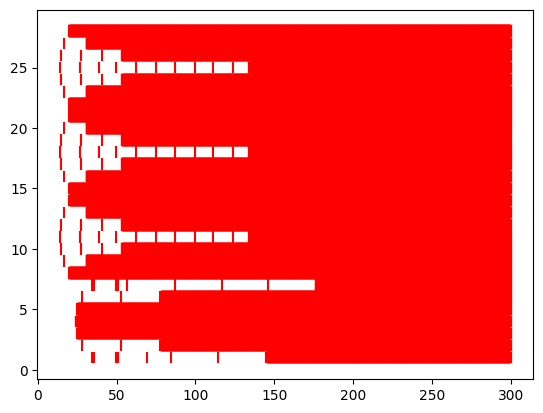

<ipython-input-79-a436e47ea48e>:12: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  I = np.where(row != 0)[0]


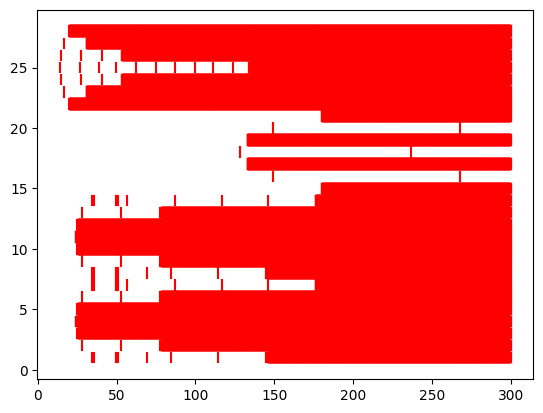

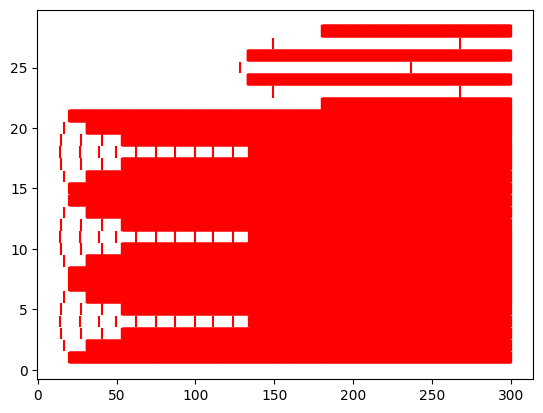

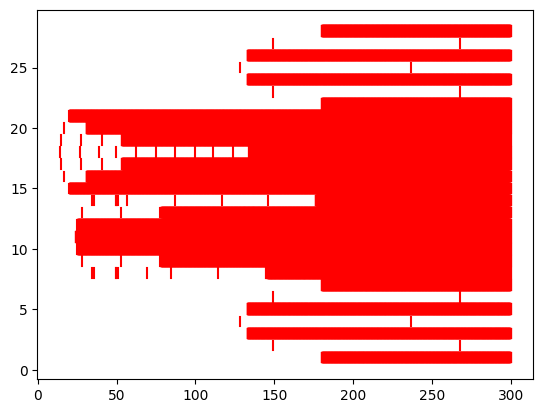

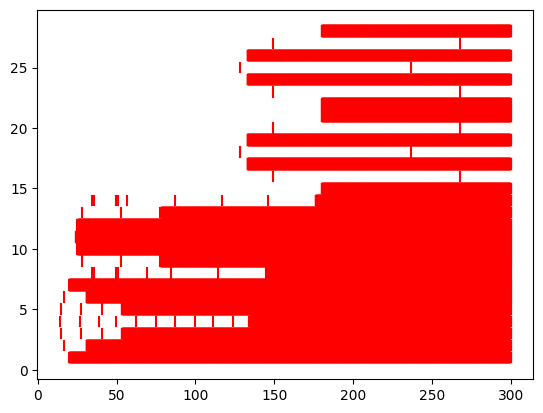

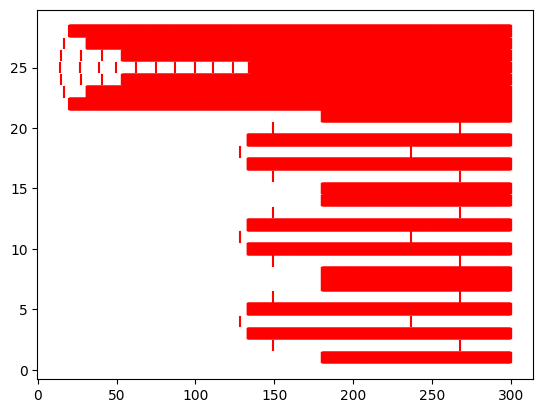

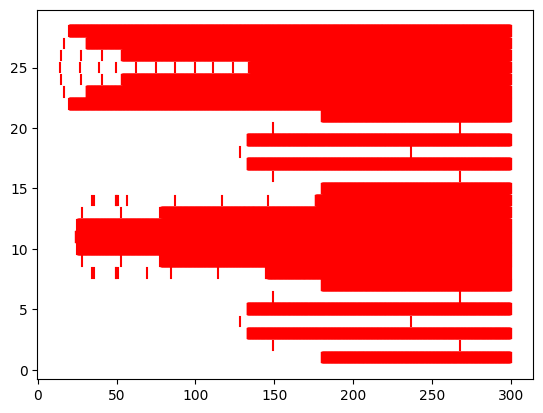

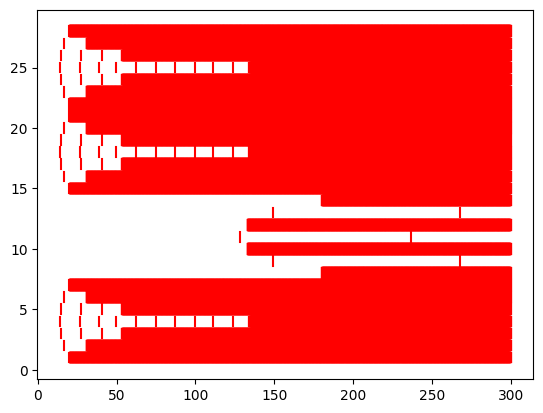

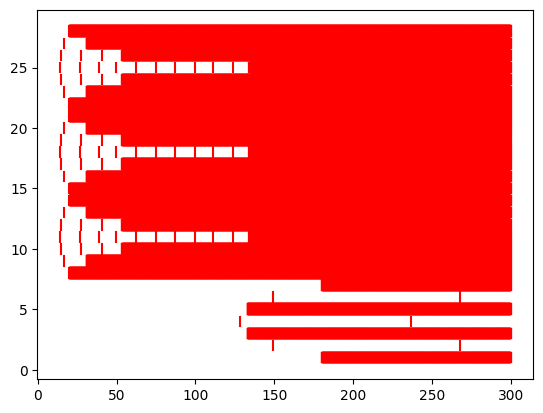

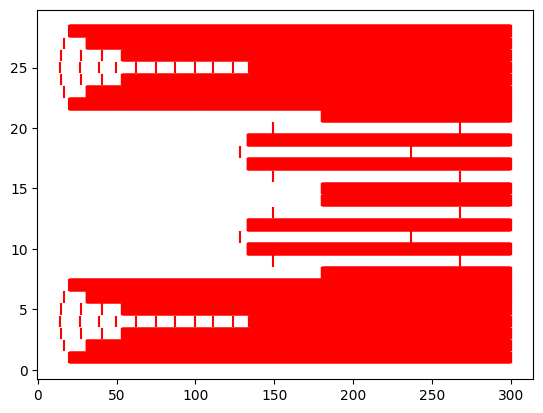

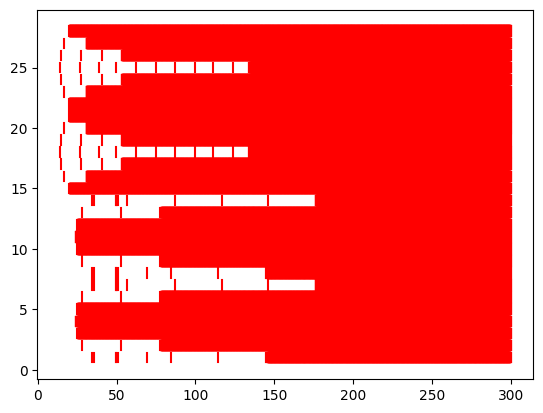

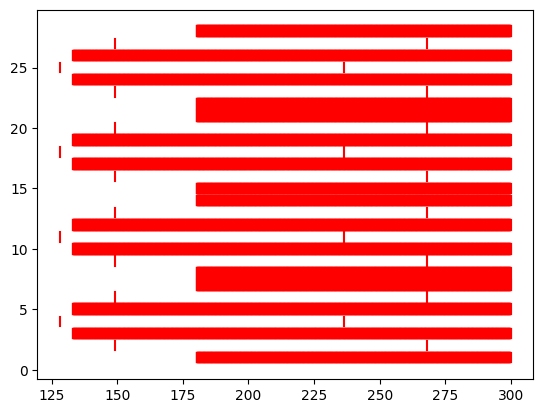

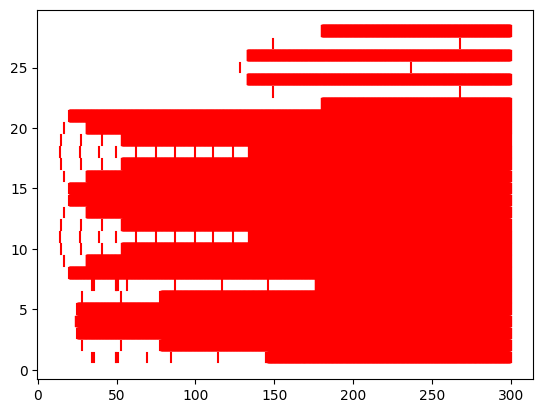

13


In [ ]:
import time
import pandas as pd
import numpy as np

# Global variables
tot_wt = None
motor_err = None
wt_4_memoryconsolidated = None

start_time = time.time()
# ------------------Extracting data from excel file---------------------
filename = 'tennis.xlsx'
traindata, trainout, testdata, testout = data_preprocessing(filename)
print(traindata)
print(testdata)
t = traindata.shape[0]

print('----------------------Encoding------------------')
# finding the mossy fibre spike positions(a cell array) with 7 neurons
# spike positions for each feature
cnt_MF = int(input('Enter the number of MFneurons to be created for each feature: '))
data = np.vstack((traindata,testdata))
mf_spiketime = gauss_kernel(data, cnt_MF)
print(len(mf_spiketime))
# print('----------------Creating cerebellar network-------------------')
# print(mf_spiketime[0])
# print(trainout.shape[0])
# Grc_ob, PC_ob, PC_time, Goc_ob = create_network(mf_spiketime[0], trainout.shape[0], 0, 0, 0,0,0)
# # Rate coding PC output into bins
# temp = spik_cnt_calc(PC_time[0, :])
# print(temp)
# print('----------------Decoding-------------------')
# # pre_mtr_angle = [None]
# # pre_mtr_angle[0], wt, fwd = [None], None, [[None]]
# # pre_mtr_angle[0][0], wt, fwd[0][0] = decoding(temp, trainout[0, 0], 0, 0, 0, 0)
# pre_mtr_angle = [None]
# pre_mtr_angle[0], wt, fwd = [None], None, [[None]]
# decoded_value, wt, fwd_value = decoding(temp, trainout[0, 0], 0, 0, 0, 0)

# if decoded_value is not None:
#     pre_mtr_angle[0] = decoded_value

# print("\n\n Weight:",wt)
# # Check the type of wt and reshape if necessary
# if wt is not None:
#     if isinstance(wt, list):

#       max_len = max(len(sublist) for sublist in wt)  # find the maximum sub-list length
#       wt = np.array([sublist + [0] * (max_len - len(sublist)) for sublist in wt])

#       wt.reshape((2, -1))  # Reshape after padding

# if fwd_value is not None and fwd is not None:
#     fwd[0][0] = fwd_value

# print('----------------Error and weight consolidation-------------------')
# err_with_sign = np.array([[trainout[0, 0] - pre_mtr_angle[0][0]]])
# motor_err = [None]
# motor_err[0] = np.array([[err_with_sign[0, 0]]])
# print(tot_wt)
# #tot_wt = [None, None, [None]]
# tot_wt.append(wt)
# # Weight in the network for each input pattern is stored
# wt_4_memoryconsolidated = [tot_wt]
# print('------------------------Training phase------------------------')
# print(trainout,fwd)
# Grc_ob, PC_ob, _, err_with_sign = training(mf_spiketime, trainout, 1, Goc_ob, Grc_ob, PC_ob, fwd)
# end_time = time.time()
# print(f"Training Time: {end_time - start_time} seconds")

# start_time = time.time()
# print('------------------------Testing phase------------------------')
# pre_mtr_angle, testerr = testpart(testout, testdata, cnt_MF, Goc_ob, Grc_ob, PC_ob)
# end_time = time.time()
# print(f"Testing Time: {end_time - start_time} seconds")

# print('------------------------Error percent------------------------')
# tot = np.sum(np.abs(motor_err[-1]))
# trainerrpercent = (tot / trainout.shape[0]) * 100
# tot1 = np.sum(np.abs(testerr))
# testerrpercent = (tot1 / testout.shape[0]) * 100

In [ ]:
print('----------------Creating cerebellar network-------------------')
print(mf_spiketime[0])
print(trainout.shape[1])
Grc_ob, PC_ob, PC_time, Goc_ob = create_network(mf_spiketime[0], trainout.shape[1], 0, 0, 0,0,0)
# Rate coding PC output into bins
temp = spik_cnt_calc(PC_time[0, :])
print(temp)

----------------Creating cerebellar network-------------------
[[  0.      0.      0.    ...   0.      0.      0.   ]
 [260.425   0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]
 ...
 [  0.      0.      0.    ...   0.      0.      0.   ]
 [260.425   0.      0.    ...   0.      0.      0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]]
1
1
[[7.63216207]
 [7.35995135]
 [6.1700364 ]
 [9.93366723]
 [3.9195822 ]
 [4.37785939]
 [6.7732433 ]
 [1.5716207 ]
 [9.23463363]
 [1.08631089]
 [1.33708613]
 [2.60705838]]


<ipython-input-80-155bd471b96b>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wt[k] = self.MF_Goc_wt[r][i]


[1.5716207  6.7732433  6.7732433  ... 9.93366723 9.93366723 9.93366723]
[[44, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71]]
[1. 2. 2. 1. 2. 2.]


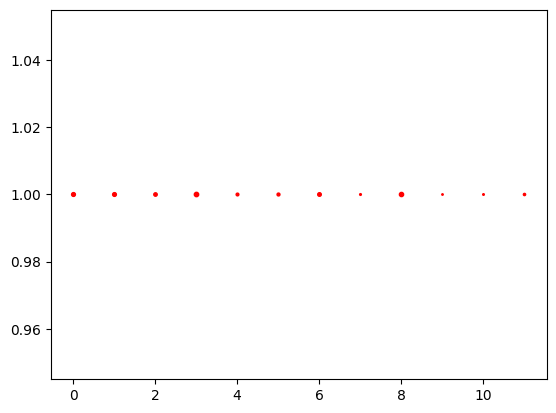

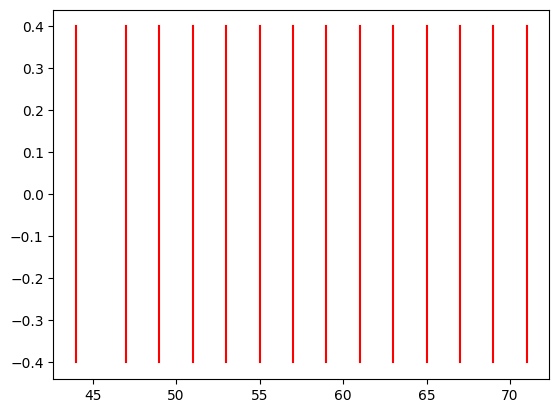

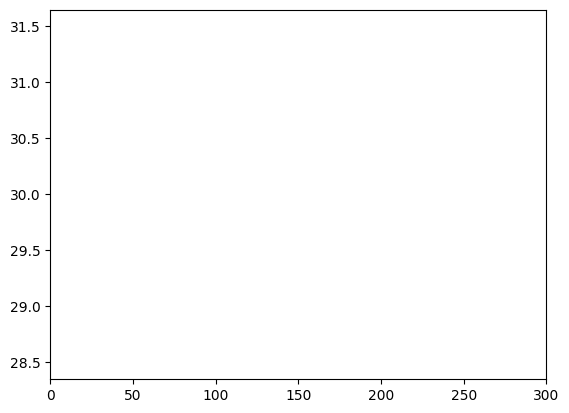

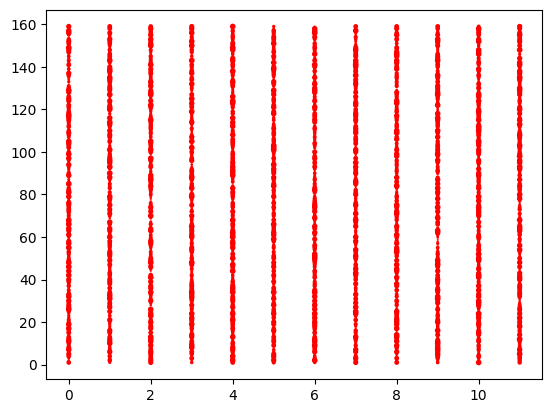

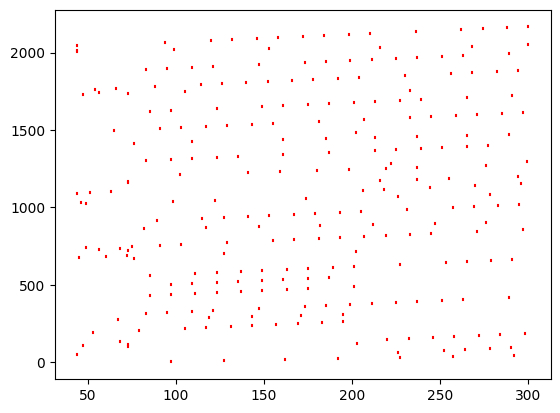

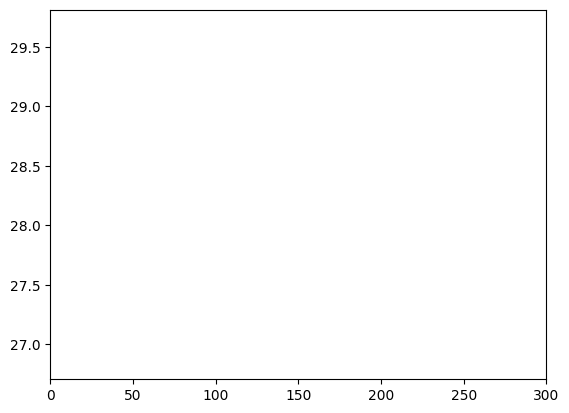

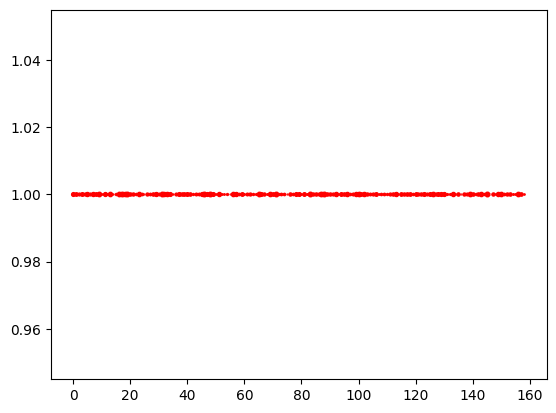

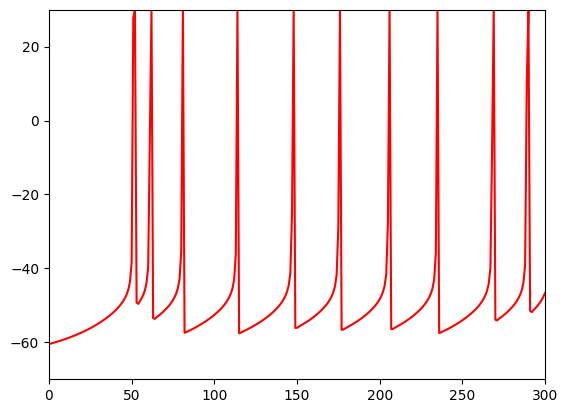

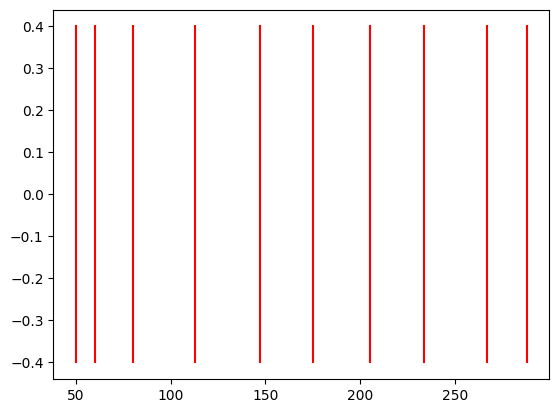

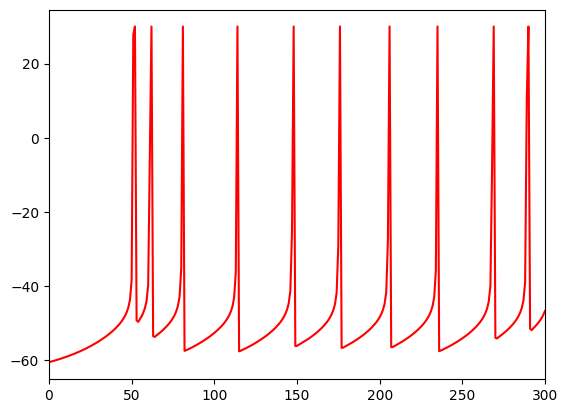

In [ ]:
c = 'red'
plotGoc(Goc_ob,c)
plotGrc(Grc_ob,c)
plotPC(PC_ob,c)

In [ ]:
print('----------------Decoding-------------------')
pre_mtr_angle = [None]
pre_mtr_angle[0], wt, fwd = [None], None, [[None]]
pre_mtr_angle[0][0], wt, fwd[0][0] = decoding(temp, trainout[0][0], 0, 0, 0, 0)
# pre_mtr_angle = [None]
# pre_mtr_angle[0], wt, fwd = [None], None, [[None]]
# decoded_value, wt, fwd_value = decoding(temp, trainout[0][0], 0, 0, 0, 0)
# if decoded_value is not None:
#     pre_mtr_angle[0] = decoded_value

print("\n\n Weight:",wt)
# # Check the type of wt and reshape if necessary
# if wt is not None:
#     if isinstance(wt, list):

#       max_len = max(len(sublist) for sublist in wt)  # find the maximum sub-list length
#       wt = np.array([sublist + [0] * (max_len - len(sublist)) for sublist in wt])

#       wt.reshape((2, -1))  # Reshape after padding

# if fwd_value is not None and fwd is not None:
#     fwd[0][0] = fwd_value

----------------Decoding-------------------


 Weight: [[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


In [ ]:
print('----------------Error and weight consolidation-------------------')
err_with_sign = np.array([[trainout[0, 0] - pre_mtr_angle[0][0]]])

motor_err = []
motor_err.append(np.array([[err_with_sign[0, 0]]]))
print(tot_wt)
#tot_wt = [None, None, [None]]
tot_wt.append(wt)
print("\n",tot_wt[2])
# Weight in the network for each input pattern is stored
wt_4_memoryconsolidated = [tot_wt]
print(wt_4_memoryconsolidated[0][2])

----------------Error and weight consolidation-------------------
[array([[5.65997673, 0.6473248 , 1.08562073, ..., 8.55632338, 2.38700358,
        7.86666602],
       [1.46499055, 5.48134397, 2.7454382 , ..., 0.17829349, 6.25702749,
        6.32863297],
       [7.21022946, 7.56454505, 6.65509518, ..., 5.12142608, 8.39231565,
        5.554991  ],
       ...,
       [2.78422356, 1.79012948, 4.96620079, ..., 1.50863627, 5.17672857,
        6.1112157 ],
       [9.34944296, 0.09162464, 3.19102007, ..., 6.34254222, 9.5526661 ,
        3.09489237],
       [4.89120679, 4.57569702, 5.65635023, ..., 1.99211064, 6.75178269,
        8.0065653 ]]), array([[ 7.36874417],
       [ 6.36937357],
       [ 4.15066872],
       [ 6.79522105],
       [ 4.13361406],
       [ 8.52010177],
       [ 4.09620489],
       [ 8.36621982],
       [ 6.48917595],
       [10.18461193],
       [ 0.78166489],
       [ 7.83462923],
       [ 1.23340882],
       [ 9.53800059],
       [ 0.48716369],
       [ 2.42395368],
   

In [ ]:
print('------------------------Training phase------------------------')

Grc_ob, PC_ob, _, err_with_sign = training(mf_spiketime[0:t-1], trainout, 1, Goc_ob, Grc_ob, PC_ob, fwd)
print(err_with_sign)
end_time = time.time()
print(f"Training Time: {end_time - start_time} seconds")

start_time = time.time()

------------------------Training phase------------------------
0


<ipython-input-82-52861c3ec6f6>:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wt[MF, i] -= lr * e2 * wt[MF, i]
<ipython-input-83-d711839842d2>:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wt[Grc,i] -= lr * e1[i] * wt[Grc,i]


1


<ipython-input-89-9353347eae4b>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wgt[-1][i] -= (err_Out * fwd[check][i])


2
3
4
5
6
7
8
9
[[-1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [-1.]
 [ 0.]
 [-1.]
 [-1.]]
Training Time: 653.3795344829559 seconds


In [ ]:
print('------------------------Testing phase------------------------')
pre_mtr_angle, testerr = testpart(mf_spiketime[t:-1],testdata, testout, cnt_MF, Goc_ob, Grc_ob, PC_ob)
end_time = time.time()
print(f"Testing Time: {end_time - start_time} seconds")

------------------------Testing phase------------------------
[array([[  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [260.425,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [260.425,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ]]), array([[ 71.925,  72.3  ,  72.375, ...,   0.   ,   0.   ,   0.   ],
       [ 50.675,  87.25 , 130.925, ...,   0.   ,   0.   ,   0.   ],
       [ 71.925,  72.3  ,  72.375, ...,   0.   ,   0.   ,   0.   ],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [260.425,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ]]), array([[  0.   ],
       [260.425],
       [  0.   ],
       [  0.   ],
       [260.425],
   

In [ ]:
print('------------------------Error percent------------------------')
tot = np.sum(np.abs(motor_err[-1]))
trainerrpercent = (tot / trainout.shape[0]) * 100
tot1 = np.sum(np.abs(testerr))
testerrpercent = (tot1 / testout.shape[0]) * 100
print(trainerrpercent)
print(testerrpercent)

------------------------Error percent------------------------
44.44444444444444
75.0
